In [1]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=6)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialBound.logistic import get_logistic_result
from GPAdversarialDatasets import getMNISTexample, getbankexample, getcreditexample, getspamexample,getsynthexample

# from GPAdversarialBound.test import testing
# testing()

## MNIST Demo

In [2]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splittype='35') #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

Comparing 3 vs 5


Comparing sparse approximation with basic result

Xtrain.shape:
(100, 35)


reconstraining parameters gp_classification.rbf.variance


Sparse...


reconstraining parameters sparse_gp.rbf.variance


Starting...
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34]]
.[0]
[-0.339223 -0.028642]
[-0.279886 -0.013913]
[-0.339223 -0.028642]
[-0.279886 -0.013913]
[-0.339223 -0.028642]
[-0.279886 -0.013913]
.[1]
[-0.126498  0.164776]
[ 0.096755 -0.085445]
[ 0.190769 -0.03588 ]
[0.144677 0.032688]
[ 0.307388 -0.03588 ]
[0.144677 0.032688]
.[2]
[ 0.212395 -0.302453]
[0.38517  0.013455]
[-0.020843  0.164023]
[ 0.135217 -0.088894]
[ 0.179752 -0.050165]
[ 0.010343 -0.010485]
.[3]
[-0.429429 -0.289707]
[-0.018738 -0.089865]
[-0.276698 -0.004189]
[-0.063441  0.24975 ]
[-0.276698  0.229049]
[0.523974 0.036427]
.[4]
[-0.459745 -0.018987]
[0.093379 0.368082]
[-0.324933  0.210504]
[0.218879 0.01807 ]
[-0.530449  0.055258]
[0.218879 0.251308]
.[5]
[ 0.03573  -0.385854]
[-0.080889 -0.035997]
[-0.39441   0.055801]
[0.038146 0.340894]
[-0.39441   0.055801]
[-0

reconstraining parameters gp_classification.rbf.variance


not sparse...


reconstraining parameters gp_classification.rbf.variance


Starting...
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34]]
.[0]
[-0.203895 -0.0973  ]
[-0.227114  0.069168]
[-0.203895 -0.0973  ]
[-0.227114  0.069168]
[-0.203895 -0.0973  ]
[-0.227114  0.069168]
.[1]
[0.056643 0.092169]
[-0.015893  0.033339]
[0.142866 0.092268]
[-0.063881 -0.121172]
[0.159889 0.102831]
[-0.105876 -0.122016]
.[2]
[ 0.240365 -0.22174 ]
[ 0.100771 -0.134461]
[ 0.063248 -0.067943]
[ 0.20079  -0.061312]
[0.092364 0.040838]
[ 0.121689 -0.055909]
.[3]
[-0.170863  0.205134]
[ 0.096646 -0.047996]
[-0.289225 -0.083359]
[0.101299 0.077637]
[-0.344861 -0.171998]
[0.420242 0.029355]
.[4]
[-0.181297 -0.001233]
[-0.098185  0.117831]
[-0.308295 -0.158577]
[0.223211 0.030941]
[-0.427076 -0.016755]
[0.344401 0.070082]
.[5]
[ 0.070353 -0.237956]
[0.071305 0.178301]
[ 0.277885 -0.098013]
[ 0.064158 -0.27854 ]
[-0.348684 -0.021192]
[-0.2

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,
         3.,  7., 14.,  4.,  0.,  0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 1 Patch objects>)

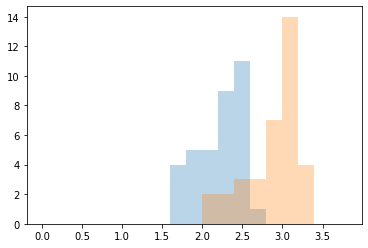

In [3]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1, 4, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3)

results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,False, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3,histtype='stepfilled')

The distance between the 5th and 95th percentile training points is reported above in [brackets]. Both computations seem to end up above these thresholds.

There is an additional process in which the largest results are recomputed with a tighter bound:

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


Xtrain.shape:
(100, 35)
Sparse...
Starting...
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34]]
.[0]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
.[1]
[-0.126553  0.164662]
[ 0.096777 -0.085662]
[ 0.190691 -0.0329  ]
[-0.144684  0.039992]
[ 0.30731 -0.0329 ]
[-0.144684  0.039992]
.[2]
[ 0.212337 -0.302557]
[0.385164 0.013819]
[-0.020901  0.163919]
[ 0.135241 -0.089112]
[ 0.179673 -0.050157]
[0.01034  0.021723]
.[3]
[-0.429393 -0.289917]
[-0.018785 -0.089735]
[-0.276644 -0.004307]
[0.063342 0.249857]
[-0.276644  0.228931]
[0.524004 0.036859]
.[4]
[-0.459711 -0.019206]
[0.093374 0.368086]
[-0.324882  0.210367]
[0.218961 0.017887]
[-0.530363  0.055267]
[0.218961 0.251125]
.[5]
[ 0.035778 -0.385501]
[-0.080841 -0.035644]
[-0.394327  0.05581 ]
[ 0.038189 -0

.[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.148839 -0.055975]
[ 0.053454 -0.057845]
[0.266773 0.057089]
[0.36765  0.055562]
[ 0.472747 -0.004543]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.148839 -0.055975]
[ 0.053454 -0.057845]
[0.266773 0.057089]
[0.36765  0.055562]
[ 0.112921 -0.006043]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.148839 -0.055975]
[ 0.055324 -0.057703]
[0.266773 0.057089]
[ 0.374683 -0.002196]
[ 0.112921 -0.006043]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.148839 -0.055975]
[ 0.055324 -0.057703]
[ 0.625325 -0.0002  ]
[ 0.374683 -0.002196]
[ 0.112921 -0.006043]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[-0.148839 -0.055975]
[0.755274 0.001123]
[ 0.625325 -0.0002  ]
[0.37303  0.043147]
[ 0.112921 -0.006043]
[-0.279887 -0.013902]
[-0.339144 -0.055799]
[

(array([0., 0., 0., 0., 0., 0., 7., 2., 5., 5., 5., 9., 2., 0., 0., 0., 0.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

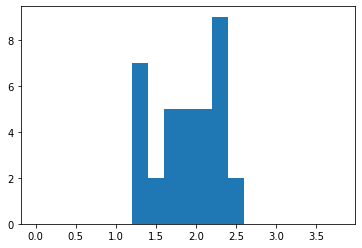

In [4]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,4, 1.0, 0.5, 0.0001,2,50,2,(7, 10))
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

In [5]:
print(np.diff(abCI))

[2.731026]


In the above example all the possible paths considered are now below this threshold, so we know at least two pixels need changing.

We can compare with logistic regression:

In [6]:
logres = get_logistic_result(Xtrain,Ytrain,Xtest,Ytest)
print("C, Score, cumulativelatents[0], cumulativelatents[1], cumulativelatents[2], cumulativelatents[3], cumulativelatents[4], ci, pixelsneeded")
for r in logres:
    print("%0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %d" % tuple(r))

C, Score, cumulativelatents[0], cumulativelatents[1], cumulativelatents[2], cumulativelatents[3], cumulativelatents[4], ci, pixelsneeded
0.01, 67.50, 0.04, 0.09, 0.13, 0.17, 0.20, 0.19, 4
0.01, 71.00, 0.05, 0.11, 0.16, 0.20, 0.24, 0.23, 4
0.01, 71.50, 0.06, 0.13, 0.18, 0.24, 0.29, 0.27, 4
0.01, 73.00, 0.08, 0.15, 0.22, 0.29, 0.35, 0.32, 4
0.01, 74.00, 0.09, 0.18, 0.26, 0.34, 0.41, 0.38, 4
0.02, 76.50, 0.10, 0.21, 0.31, 0.40, 0.49, 0.45, 4
0.02, 77.00, 0.12, 0.24, 0.36, 0.47, 0.57, 0.53, 4
0.03, 77.50, 0.14, 0.28, 0.42, 0.55, 0.67, 0.61, 4
0.03, 78.50, 0.17, 0.33, 0.49, 0.64, 0.77, 0.70, 4
0.04, 79.00, 0.19, 0.38, 0.57, 0.74, 0.89, 0.80, 4
0.05, 79.00, 0.23, 0.45, 0.65, 0.85, 1.02, 0.90, 4
0.06, 81.00, 0.26, 0.51, 0.74, 0.97, 1.16, 1.02, 4
0.07, 82.00, 0.30, 0.59, 0.85, 1.10, 1.32, 1.14, 4
0.09, 81.50, 0.35, 0.67, 0.96, 1.24, 1.48, 1.26, 4
0.11, 82.50, 0.40, 0.76, 1.08, 1.39, 1.66, 1.40, 4
0.14, 82.50, 0.45, 0.86, 1.22, 1.54, 1.86, 1.55, 4
0.17, 83.50, 0.52, 0.97, 1.36, 1.73, 2.08, 1.69